In [61]:
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [62]:
t = pd.read_excel('../result/metabo_mean.xlsx')
fba = pd.read_csv('../result/__fba__.csv', index_col=0)
a = fba.loc[[
    'R00268', 'R01056', 'R01049', 'R04779', 
    'R00342', 'R01082', 'R01325', 'R02740'
]].sort_index()
a.index = [
    'akg', 'R5P→R5P', 'PRPP', 'F6P→F1,6P', 'Oxaloacetate, Malate', 
    'Malate, Fumarate', 'Citrate', 'G6P→F6P'
]

In [63]:
d = pd.read_csv('../result/slope.csv', index_col=0).T
v = pd.DataFrame(pd.read_excel('../result/lac.xlsx').mean()).T
v.columns = d.columns
slope = pd.concat([d, v])
slope = slope.rename(index={0:'Lactate'})
slope = pd.concat([slope, pd.DataFrame([21.78, 12.8, 16.84], columns=['Doubling Time'] , index=slope.columns).T])

In [130]:
def nonlinear_fit(x, a, b, c):
    return  a*np.exp(b*x) - c

/Users/yoshitaka-i/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


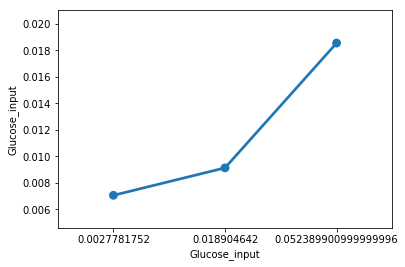

Control    0.007070
Clone A    0.018550
Clone B    0.009139
Name: Glucose_input, dtype: float64
0.003019446613178422 30.294347276495834 -0.0037856622643358986


In [131]:
# Control Clone B Clone A
x = fba.loc['Glucose_input'] 
y = fba.loc['Oxygen_input'] 
param, cov = curve_fit(nonlinear_fit, x, y, p0=[1, 3, 1])
sns.pointplot(x=x, y=y, join=False)
sns.pointplot(x=x, y=nonlinear_fit(x, param[0], param[1], param[2]), markers="")
plt.show()
print(nonlinear_fit(x, param[0], param[1], param[2]))
print(param[0], param[1], param[2])

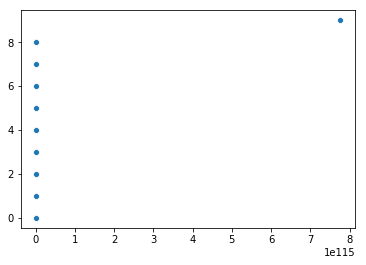

In [133]:
sns.scatterplot(
    [nonlinear_fit(i, param[0], param[1], param[2]) for i in range(0, 10)],
    [i for i in range(0, 10)]
)

In [125]:
def nonlinear_fit(x,a,b):
    return  b - np.exp(np.log(2)*x)/a

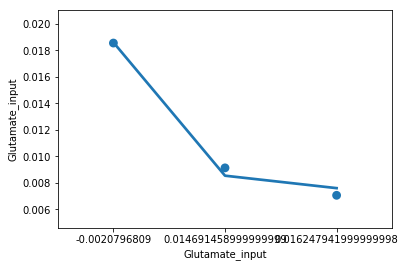

Control    0.007610
Clone A    0.018600
Clone B    0.008549
Name: Glutamate_input, dtype: float64
1.1616436495663633 0.8782092393643678


In [126]:
# Control Clone B Clone A
x = fba.loc['Glutamate_input'] 
y = fba.loc['Oxygen_input'] 
param, cov = curve_fit(nonlinear_fit, x, y, p0=[1, 3])
sns.pointplot(x=x, y=y, join=False)
sns.pointplot(x=x, y=nonlinear_fit(x, param[0], param[1]), markers="")
plt.show()
print(nonlinear_fit(x, param[0], param[1]))
print(param[0], param[1])